In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

## Libraries and Filesystem Setup

In [4]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse
import scipy

### Import LDA document vectors

In [7]:
lda_10_matrix = np.load('../../processed_files/lda_10_matrix.npy')
lda_25_matrix = np.load('../../processed_files/lda_25_matrix.npy')
lda_50_matrix = np.load('../../processed_files/lda_50_matrix.npy')
df_merged = pickle.load(open("../../processed_files/df_merged.pickle", "rb"))

In [9]:
lda_10_matrix.shape

(12968, 20)

In [10]:
lda_25_matrix.shape

(12968, 20)

In [11]:
lda_50_matrix.shape

(12968, 20)

In [12]:
df_merged.head()

,DOMAIN,RAW_CONTENT,RAW_CONTENT_PROCESSED,RAW_CONTENT_PROCESSED_STEMMED
0,0-my.com,0-my.com related searches: related searches:,"[mycom, related, searches, related, searches]","[0, -, m, y, ., c, o, m, , r, e, l, a, t, e, ..."
1,00bitz.com,error. page cannot be displayed. please contac...,"[error, page, cannot, displayed, please, conta...","[e, r, r, o, r, ., , p, a, g, e, , c, a, n, ..."
2,01187.com,01187.com is available for purchase! - wwwv1.c...,"[com, vailable, purchase, wwwvcom, welcome, uu...","[0, 1, 1, 8, 7, ., c, o, m, , i, s, , a, v, ..."
3,027.ir,"027.ir - dns4.ir 027.ir hits: 7,267 under cons...","[ir, dnsir, ir, hits, construction, coming, so...","[0, 2, 7, ., i, r, , -, , d, n, s, 4, ., i, ..."
4,03h.org,february | 2014 | online marketing review sear...,"[february, online, marketing, review, search, ...","[f, e, b, r, u, a, r, y, , |, , 2, 0, 1, 4, ..."


In [13]:
df_merged.shape

(12975, 4)

In [15]:
type(lda_10_matrix[0])

numpy.ndarray

In [16]:
type(lda_25_matrix[0])

numpy.ndarray

In [17]:
type(lda_50_matrix[0])

numpy.ndarray

## lda

In [18]:
from sklearn.preprocessing import normalize

In [19]:
num_clusters = 20
algorithm = 'full'

In [21]:
from sklearn.cluster import KMeans
lda_10_kmeans = KMeans(n_clusters=num_clusters, random_state=0, algorithm=algorithm).fit(lda_10_matrix)
lda_25_kmeans = KMeans(n_clusters=num_clusters, random_state=0, algorithm=algorithm).fit(lda_25_matrix)
lda_50_kmeans = KMeans(n_clusters=num_clusters, random_state=0, algorithm=algorithm).fit(lda_50_matrix)

In [10]:
lda_10_kmeans.labels_

array([ 3,  3,  6, ...,  8, 17, 17], dtype=int32)

In [22]:
lda_25_kmeans.labels_

array([ 2,  2, 12, ...,  0, 13,  7], dtype=int32)

In [23]:
lda_50_kmeans.labels_

array([1, 1, 2, ..., 5, 2, 5], dtype=int32)

In [24]:
lda_10_index_cluster = zip(range(len(lda_10_kmeans.labels_)), lda_10_kmeans.labels_)
lda_10_index_cluster_dict = dict(lda_10_index_cluster)

In [25]:
lda_25_index_cluster = zip(range(len(lda_25_kmeans.labels_)), lda_25_kmeans.labels_)
lda_25_index_cluster_dict = dict(lda_25_index_cluster)

In [26]:
lda_50_index_cluster = zip(range(len(lda_50_kmeans.labels_)), lda_50_kmeans.labels_)
lda_50_index_cluster_dict = dict(lda_50_index_cluster)
lda_50_index_cluster_dict[456]

4

In [27]:
lda_10_cluster_index = list(zip(lda_10_kmeans.labels_, range(len(lda_10_kmeans.labels_))))
lda_25_cluster_index = list(zip(lda_25_kmeans.labels_, range(len(lda_25_kmeans.labels_))))
lda_50_cluster_index = list(zip(lda_50_kmeans.labels_, range(len(lda_50_kmeans.labels_))))

In [29]:
lda_10_cluster_list = dict()
for i in range(num_clusters):
    lda_10_cluster_list[i] = list(filter(lambda row: row[0] == i, lda_10_cluster_index))
lda_25_cluster_list = dict()
for i in range(num_clusters):
    lda_25_cluster_list[i] = list(filter(lambda row: row[0] == i, lda_25_cluster_index))
lda_50_cluster_list = dict()
for i in range(num_clusters):
    lda_50_cluster_list[i] = list(filter(lambda row: row[0] == i, lda_50_cluster_index))

In [31]:
lda_10_cluster_list[0]

[(0, 65),
 (0, 68),
 (0, 71),
 (0, 93),
 (0, 107),
 (0, 108),
 (0, 110),
 (0, 200),
 (0, 203),
 (0, 209),
 (0, 215),
 (0, 220),
 (0, 234),
 (0, 235),
 (0, 236),
 (0, 256),
 (0, 257),
 (0, 270),
 (0, 275),
 (0, 284),
 (0, 291),
 (0, 296),
 (0, 299),
 (0, 303),
 (0, 309),
 (0, 324),
 (0, 338),
 (0, 342),
 (0, 346),
 (0, 357),
 (0, 363),
 (0, 369),
 (0, 371),
 (0, 384),
 (0, 385),
 (0, 390),
 (0, 391),
 (0, 392),
 (0, 408),
 (0, 436),
 (0, 440),
 (0, 441),
 (0, 443),
 (0, 444),
 (0, 459),
 (0, 462),
 (0, 470),
 (0, 471),
 (0, 498),
 (0, 510),
 (0, 520),
 (0, 553),
 (0, 564),
 (0, 590),
 (0, 595),
 (0, 602),
 (0, 645),
 (0, 651),
 (0, 666),
 (0, 680),
 (0, 690),
 (0, 691),
 (0, 699),
 (0, 704),
 (0, 713),
 (0, 718),
 (0, 726),
 (0, 727),
 (0, 730),
 (0, 739),
 (0, 746),
 (0, 807),
 (0, 818),
 (0, 842),
 (0, 843),
 (0, 865),
 (0, 873),
 (0, 874),
 (0, 895),
 (0, 902),
 (0, 911),
 (0, 963),
 (0, 971),
 (0, 972),
 (0, 986),
 (0, 989),
 (0, 993),
 (0, 1024),
 (0, 1044),
 (0, 1073),
 (0, 1080),

In [32]:
print(lda_10_kmeans.labels_.shape)
print(lda_10_kmeans.cluster_centers_.shape)

(12968,)
(20, 20)


In [33]:
import statistics

# index is cluster index
def lda_10_intracluster_similarity(index):
    cluster_centroid = lda_10_kmeans.cluster_centers_[index]
    dist_list = []
    cluster = lda_10_cluster_list[index]
    for i in cluster:
        distance = np.linalg.norm(cluster_centroid-lda_10_matrix[i[1]])
        dist_list.append(distance)
        
    #avg = sum_dist/(len(indices[index])-1)
    avg = np.average(dist_list)

    #variance = statistics.variance(dist_list)
    variance = np.var(dist_list)
    
    return avg, variance

In [34]:
# index is cluster index
def lda_25_intracluster_similarity(index):
    cluster_centroid = lda_25_kmeans.cluster_centers_[index]
    dist_list = []
    cluster = lda_25_cluster_list[index]
    for i in cluster:
        distance = np.linalg.norm(cluster_centroid-lda_25_matrix[i[1]])
        dist_list.append(distance)
        
    #avg = sum_dist/(len(indices[index])-1)
    avg = np.average(dist_list)

    #variance = statistics.variance(dist_list)
    variance = np.var(dist_list)
    
    return avg, variance

In [35]:
# index is cluster index
def lda_50_intracluster_similarity(index):
    cluster_centroid = lda_50_kmeans.cluster_centers_[index]
    dist_list = []
    cluster = lda_50_cluster_list[index]
    for i in cluster:
        distance = np.linalg.norm(cluster_centroid-lda_50_matrix[i[1]])
        dist_list.append(distance)
        
    #avg = sum_dist/(len(indices[index])-1)
    avg = np.average(dist_list)

    #variance = statistics.variance(dist_list)
    variance = np.var(dist_list)
    
    return avg, variance

In [36]:
lda_10_intracluster_similarity(19)

(0.368120962384465, 0.006657706050686726)

In [37]:
lda_25_intracluster_similarity(19)

(0.3345677497461478, 0.006798001134181229)

In [38]:
lda_50_intracluster_similarity(19)

(0.3179623983745287, 0.00764493913056602)

In [39]:
# index is cluster / cluster id
def generate_raw_content_cluster_10_df(index):
    index_list = lda_10_cluster_list[index]
    index_list = [x[1] for x in index_list]
    cluster_seed = df_merged.loc[index].to_frame().T
    #cluster_df = df_merged.loc[index_list[1:]]
    cluster_df = df_merged.loc[index_list[1:]]
    combined = pd.concat([cluster_seed, cluster_df])
    combined['cluster'] = index
    return combined

def generate_raw_content_cluster_25_df(index):
    index_list = lda_25_cluster_list[index]
    index_list = [x[1] for x in index_list]
    cluster_seed = df_merged.loc[index].to_frame().T
    #cluster_df = df_merged.loc[index_list[1:]]
    cluster_df = df_merged.loc[index_list[1:]]
    combined = pd.concat([cluster_seed, cluster_df])
    combined['cluster'] = index
    return combined

def generate_raw_content_cluster_50_df(index):
    index_list = lda_50_cluster_list[index]
    index_list = [x[1] for x in index_list]
    cluster_seed = df_merged.loc[index].to_frame().T
    #cluster_df = df_merged.loc[index_list[1:]]
    cluster_df = df_merged.loc[index_list[1:]]
    combined = pd.concat([cluster_seed, cluster_df])
    combined['cluster'] = index
    return combined

In [40]:
# non-unique index errors
# 14 is a good example
# 21 can we stop output after distance goes from 3 to 10.583?
# 22 is lots of similar basic e
generate_raw_content_cluster_10_df(8)

,DOMAIN,RAW_CONTENT,RAW_CONTENT_PROCESSED,RAW_CONTENT_PROCESSED_STEMMED,cluster
8,1-mag.com,captcha powered by intershield english 1-mag.c...,"[captcha, powered, intershield, english, magco...","[c, a, p, t, c, h, a, , p, o, w, e, r, e, d, ...",8
24,1755damen.com,1755damen.com 1755damen.com 2020 copyright. al...,"[damencom, damencom, copyright, sponsored, lis...","[1, 7, 5, 5, d, a, m, e, n, ., c, o, m, , 1, ...",8
32,1956ohio.com,1956ohio.com 1956ohio.com 2020 copyright. all ...,"[ohiocom, ohiocom, copyright, sponsored, listi...","[1, 9, 5, 6, o, h, i, o, ., c, o, m, , 1, 9, ...",8
38,1mgoffers.com,1mgoffers.com 1mgoffers.com 2020 copyright. al...,"[mgofferscom, mgofferscom, copyright, sponsore...","[1, m, g, o, f, f, e, r, s, ., c, o, m, , 1, ...",8
66,1x0six.men,1x0six.men this domain name expired on 2019-02...,"[xsixmen, domain, name, expired, renew, relate...","[1, x, 0, s, i, x, ., m, e, n, , t, h, i, s, ...",8
73,2368.de,2368.de -&nbspthis website is for sale! -&nbsp...,"[de, nbspthis, website, sale, nbsp, resources,...","[2, 3, 6, 8, ., d, e, , -, &, n, b, s, p, t, ...",8
78,24gfx.net,gfx travel and tour - instagram puzzle | photo...,"[gfx, travel, tour, instagram, puzzle, photosh...","[g, f, x, , t, r, a, v, e, l, , a, n, d, , ...",8
113,37508nn.com,37508nn.com 37508nn.com 2020 copyright. all ri...,"[nncom, nncom, copyright, sponsored, listings,...","[3, 7, 5, 0, 8, n, n, ., c, o, m, , 3, 7, 5, ...",8
114,380powerwash.com,after hours cleaning | professional power wash...,"[hours, cleaning, professional, power, washing...","[a, f, t, e, r, , h, o, u, r, s, , c, l, e, ...",8
118,3calm.com,3calm health use 3calm. feel better. 3calm all...,"[calm, health, use, calm, feel, better, calm, ...","[3, c, a, l, m, , h, e, a, l, t, h, , u, s, ...",8


In [41]:
generate_raw_content_cluster_25_df(8)

,DOMAIN,RAW_CONTENT,RAW_CONTENT_PROCESSED,RAW_CONTENT_PROCESSED_STEMMED,cluster
8,1-mag.com,captcha powered by intershield english 1-mag.c...,"[captcha, powered, intershield, english, magco...","[c, a, p, t, c, h, a, , p, o, w, e, r, e, d, ...",8
36,1dentalclinic.co.uk,dental|contact 6. contact address 16 devonshir...,"[dentalcontact, contact, address, devonshire, ...","[d, e, n, t, a, l, |, c, o, n, t, a, c, t, , ...",8
60,1samuel16.org,finding a pastor god's way – helping churches ...,"[finding, pastor, gods, way, –, helping, churc...","[f, i, n, d, i, n, g, , a, , p, a, s, t, o, ...",8
81,24runes.com,tiwaz rune | 24 runes learn the runes menu pos...,"[tiwaz, rune, runes, learn, runes, menu, poste...","[t, i, w, a, z, , r, u, n, e, , |, , 2, 4, ...",8
90,2fingersberben.com,i was wrong about being pro-life – vanessa ber...,"[wrong, prolife, –, vanessa, berben, writer, c...","[i, , w, a, s, , w, r, o, n, g, , a, b, o, ...",8
108,365gas.co.uk,365 gas | kirkintilloch gas bottles | glasgow ...,"[gas, kirkintilloch, gas, bottles, glasgow, de...","[3, 6, 5, , g, a, s, , |, , k, i, r, k, i, ...",8
119,3chicspolitico.com,open thread | a history lesson about abaco isl...,"[open, thread, history, lesson, abaco, island,...","[o, p, e, n, , t, h, r, e, a, d, , |, , a, ...",8
131,4008008898.com,welcome to centos welcome to centos the commun...,"[welcome, centos, welcome, centos, community, ...","[w, e, l, c, o, m, e, , t, o, , c, e, n, t, ...",8
170,94717.us,zipcode.us × find a .us domain there are many ...,"[zipcodeus, ×, find, us, domare, many, registr...","[z, i, p, c, o, d, e, ., u, s, , ×, , f, i, ...",8
172,97235.com.cn,双辽市信达园林绿化服务有限公司-首页 97235.com.cn the domain is ...,"[双辽市信达园林绿化服务有限公司首页, comcn, domain, sale！, leim...","[双, 辽, 市, 信, 达, 园, 林, 绿, 化, 服, 务, 有, 限, 公, 司, ...",8


In [42]:
generate_raw_content_cluster_50_df(8)

,DOMAIN,RAW_CONTENT,RAW_CONTENT_PROCESSED,RAW_CONTENT_PROCESSED_STEMMED,cluster
8,1-mag.com,captcha powered by intershield english 1-mag.c...,"[captcha, powered, intershield, english, magco...","[c, a, p, t, c, h, a, , p, o, w, e, r, e, d, ...",8
117,3am.eu,3am.eu - 3am resources and information. 3am.eu...,"[ameu, resources, information, ameu, webpage, ...","[3, a, m, ., e, u, , -, , 3, a, m, , r, e, ...",8
137,4caddy.com,error. page cannot be displayed. please contac...,"[error, page, cannot, displayed, please, conta...","[e, r, r, o, r, ., , p, a, g, e, , c, a, n, ...",8
166,8lens.com,8lens.com related searches: related searches:,"[lenscom, related, searches, related, searches]","[8, l, e, n, s, ., c, o, m, , r, e, l, a, t, ...",8
174,99b.uk,99b main index page a b c d e f g h i j 99b th...,"[b, main, index, page, b, c, e, f, g, h, j, b,...","[9, 9, b, , m, a, i, n, , i, n, d, e, x, , ...",8
175,9ja.today,bolivian lawmakers seek election breakthrough ...,"[bolivian, lawmakers, seek, election, breakthr...","[b, o, l, i, v, i, a, n, , l, a, w, m, a, k, ...",8
321,adonaimty.com,index of / index of / 2020-04-28 23:04 0 2020-...,"[index, index]","[i, n, d, e, x, , o, f, , /, , i, n, d, e, ...",8
356,afghanshow.com,fayaz hamid videos ×close sign in don't have a...,"[fayaz, hamid, videos, ×close, sign, dont, acc...","[f, a, y, a, z, , h, a, m, i, d, , v, i, d, ...",8
359,aflebedevo.tk,welcome to aflebedevo.tk! welcome to aflebedev...,"[welcome, aflebedevotk, welcome, aflebedevotk,...","[w, e, l, c, o, m, e, , t, o, , a, f, l, e, ...",8
419,airtilus.net,"sorry, your browser does not support frames. p...","[sorry, browser, support, frames, please, go, ...","[s, o, r, r, y, ,, , y, o, u, r, , b, r, o, ...",8


In [43]:
lda_10_avg_list = []
lda_10_variance_list = []

for i in range(num_clusters):
    avg, variance = lda_10_intracluster_similarity(i)
    lda_10_avg_list.append(avg)
    lda_10_variance_list.append(variance)

In [44]:
lda_25_avg_list = []
lda_25_variance_list = []

for i in range(num_clusters):
    avg, variance = lda_25_intracluster_similarity(i)
    lda_25_avg_list.append(avg)
    lda_25_variance_list.append(variance)

In [45]:
lda_50_avg_list = []
lda_50_variance_list = []

for i in range(num_clusters):
    avg, variance = lda_50_intracluster_similarity(i)
    lda_50_avg_list.append(avg)
    lda_50_variance_list.append(variance)

([<matplotlib.axis.XTick at 0x1b894b1dd8>,
 <a list of 11 Text xticklabel objects>)

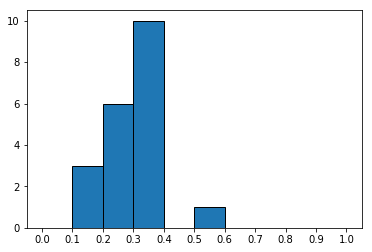

In [46]:
bins= [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
plt.hist(lda_10_avg_list, bins=bins, edgecolor="k")
plt.xticks(bins)

([<matplotlib.axis.XTick at 0x1b89573c18>,
 <a list of 11 Text xticklabel objects>)

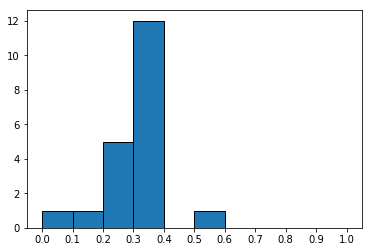

In [47]:
# neighbors = 10
bins= [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
plt.hist(lda_25_avg_list, bins=bins, edgecolor="k")
plt.xticks(bins)

([<matplotlib.axis.XTick at 0x1b895f5be0>,
 <a list of 11 Text xticklabel objects>)

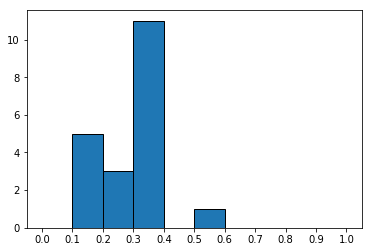

In [48]:
# neighbors = 10
bins= [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
plt.hist(lda_50_avg_list, bins=bins, edgecolor="k")
plt.xticks(bins)

## Intercluster Similarity

In [49]:
def lda_10_intercluster_dist():
    indices = range(len(lda_10_kmeans.cluster_centers_))
    centroid_centroid_distance = {}
    values = []
    for i in indices:
        for j in indices:
            if i < j:
                key = str(i) + "::" + str(j)
                distance = np.linalg.norm(lda_10_kmeans.cluster_centers_[i] - lda_10_kmeans.cluster_centers_[j])
                centroid_centroid_distance[key] = distance
                values.append(distance)
    return centroid_centroid_distance, values

def lda_25_intercluster_dist():
    indices = range(len(lda_25_kmeans.cluster_centers_))
    centroid_centroid_distance = {}
    values = []
    for i in indices:
        for j in indices:
            if i < j:
                key = str(i) + "::" + str(j)
                distance = np.linalg.norm(lda_25_kmeans.cluster_centers_[i] - lda_25_kmeans.cluster_centers_[j])
                centroid_centroid_distance[key] = distance
                values.append(distance)
    return centroid_centroid_distance, values

def lda_50_intercluster_dist():
    indices = range(len(lda_50_kmeans.cluster_centers_))
    centroid_centroid_distance = {}
    values = []
    for i in indices:
        for j in indices:
            if i < j:
                key = str(i) + "::" + str(j)
                distance = np.linalg.norm(lda_50_kmeans.cluster_centers_[i] - lda_50_kmeans.cluster_centers_[j])
                centroid_centroid_distance[key] = distance
                values.append(distance)
    return centroid_centroid_distance, values

## number of clusters = 20

In [50]:
intercluster_distances, values = lda_10_intercluster_dist()
#print('distances', values)
print('average', np.average(values))

average 0.893081176899075


In [51]:
intercluster_distances, values = lda_25_intercluster_dist()
#print('distances', values)
print('average', np.average(values))

average 0.8795607109296926


In [52]:
intercluster_distances, values = lda_50_intercluster_dist()
#print('distances', values)
print('average', np.average(values))

average 0.8944823883820339
